In [1]:
!pip install netcdf4
!pip install basemap
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 860.6/860.6 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 12.5 MB/s eta 0:00:00


In [2]:
from netCDF4 import Dataset as NetCDFFile 
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
import warnings
from statistics import mean 
warnings.filterwarnings("ignore")
import xarray as xr
import csv

In [3]:
fapar_data = xr.open_dataset('/kaggle/input/fapar-anomaly/fapan_m_euu_20220101_20221111_t.nc')
max_temp_data = xr.open_dataset('/kaggle/input/max-temp-anomaly/tpman_m_euu_20220101_20221231_d.nc')
fapar_monthly = fapar_data.resample(time='m').mean()
max_temp_monthly = max_temp_data.resample(time='m').mean()

In [4]:
lat_temp = max_temp_data.variables['lat'][:]
lon_temp = max_temp_data.variables['lon'][:]
time_temp = max_temp_data.variables['time'][:]
max_temp = max_temp_data.variables['tpman']

In [5]:
lat_fapan = fapar_data.variables['lat'][:]
lon_fapan = fapar_data.variables['lon'][:]
time_fapan = fapar_data.variables['time'][:]
fapan = fapar_data.variables['fapan']

In [6]:
max_temp_a = max_temp_monthly.variables['tpman']
fapar_a = fapar_monthly.variables['fapan']

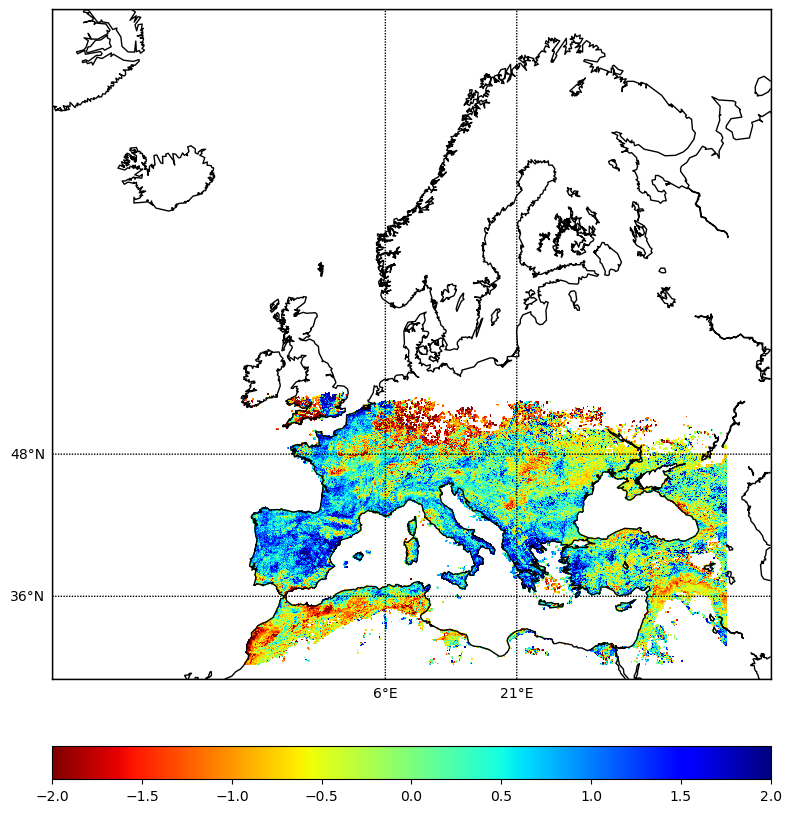

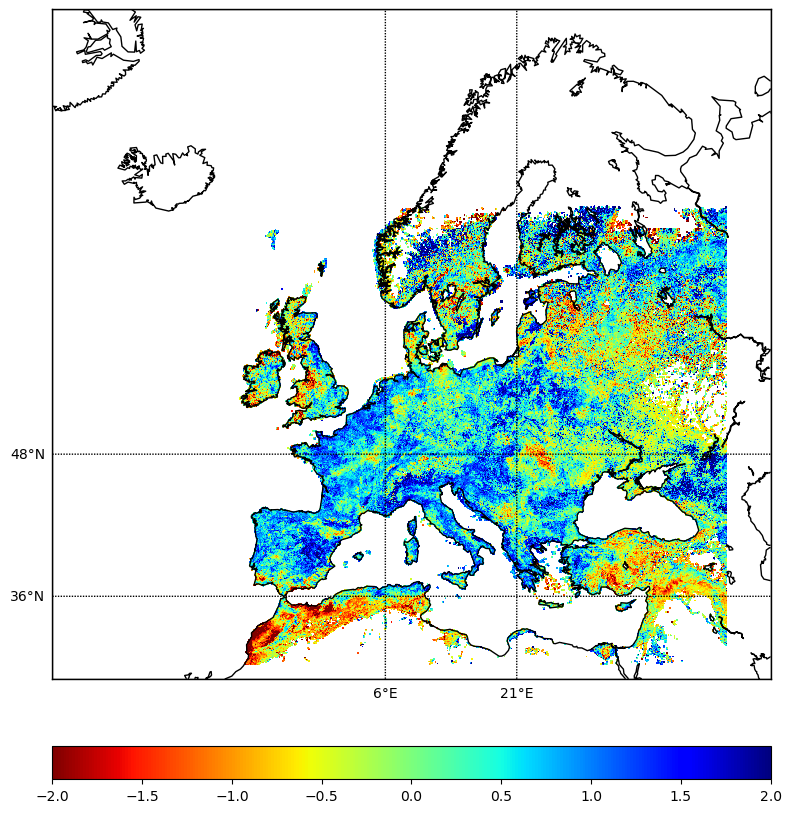

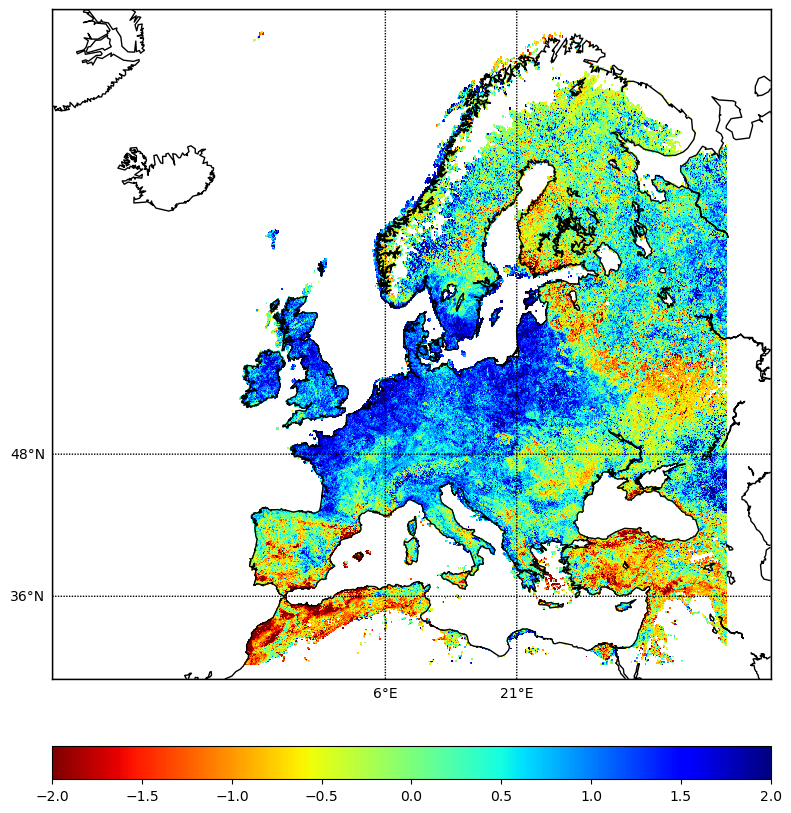

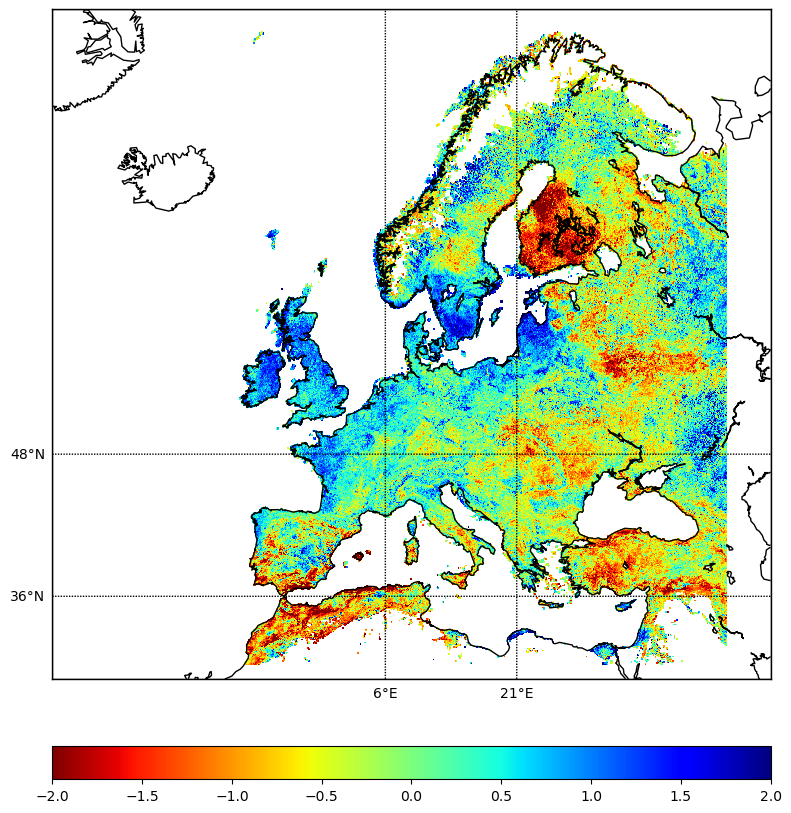

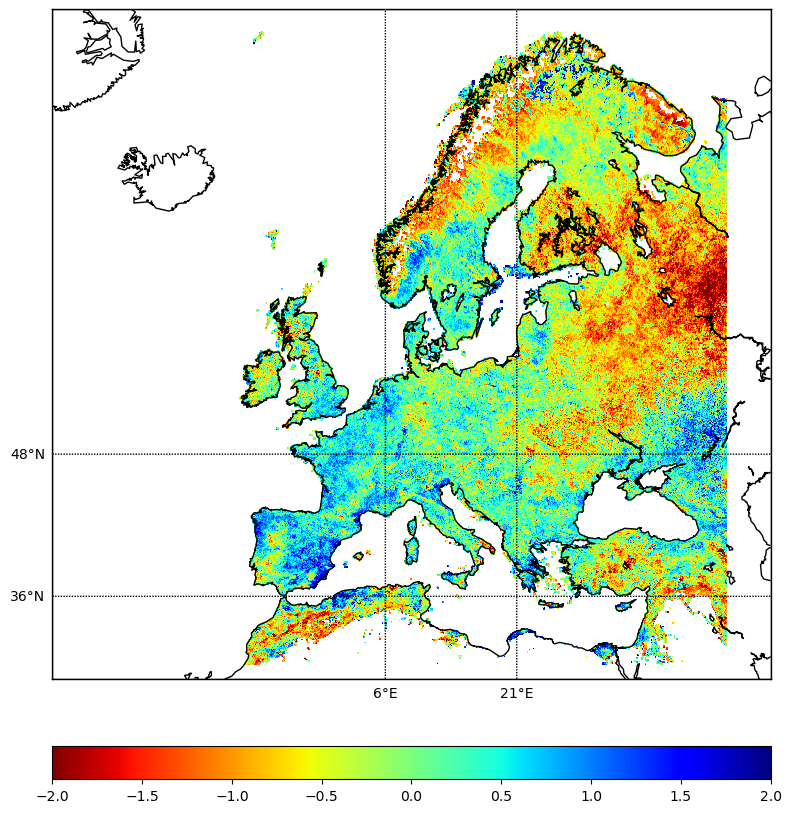

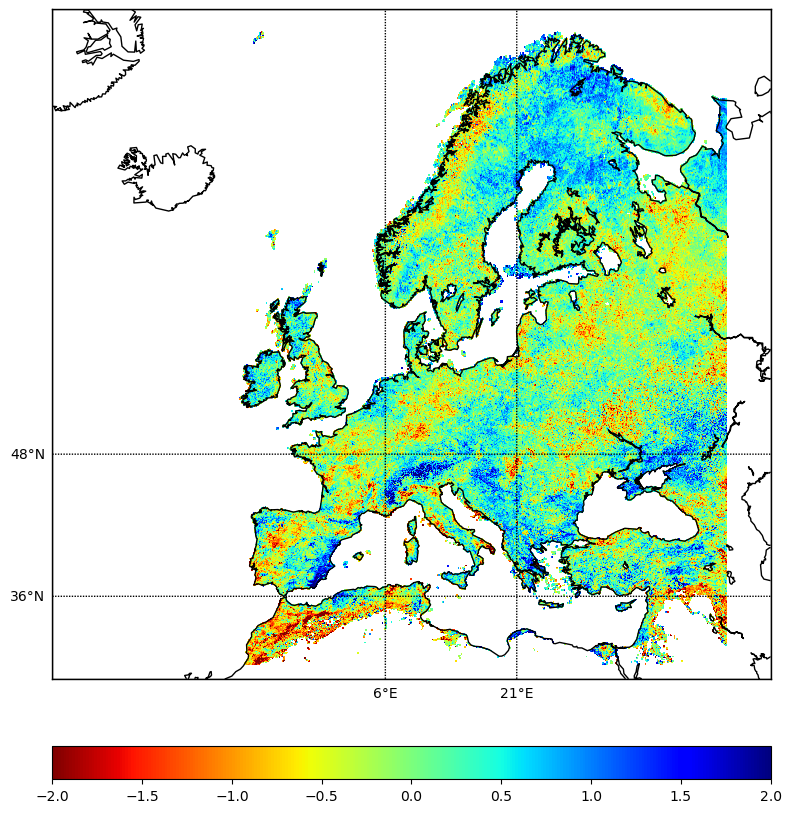

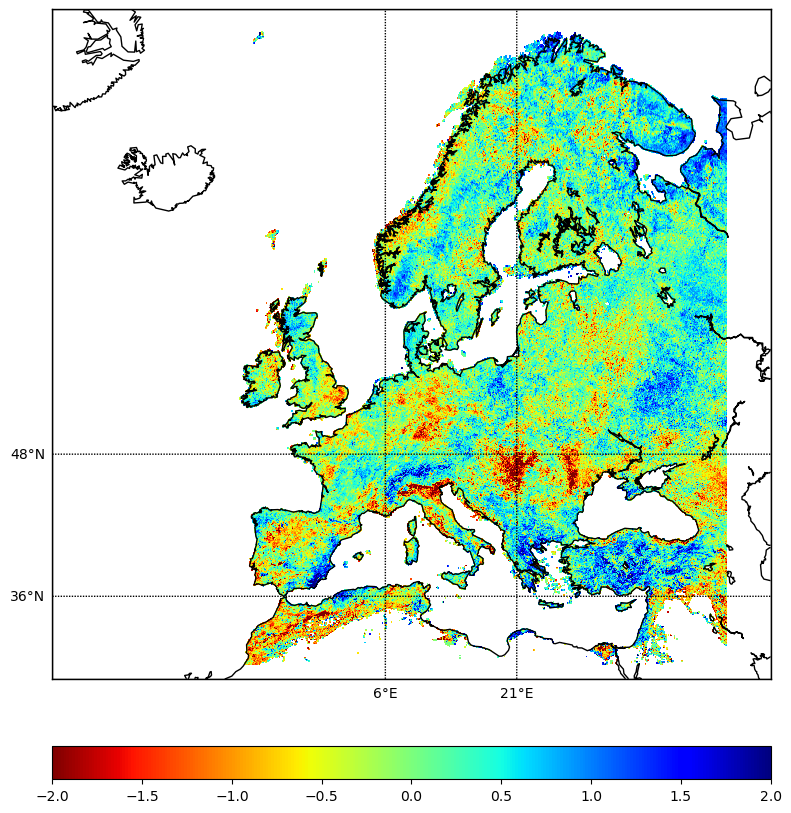

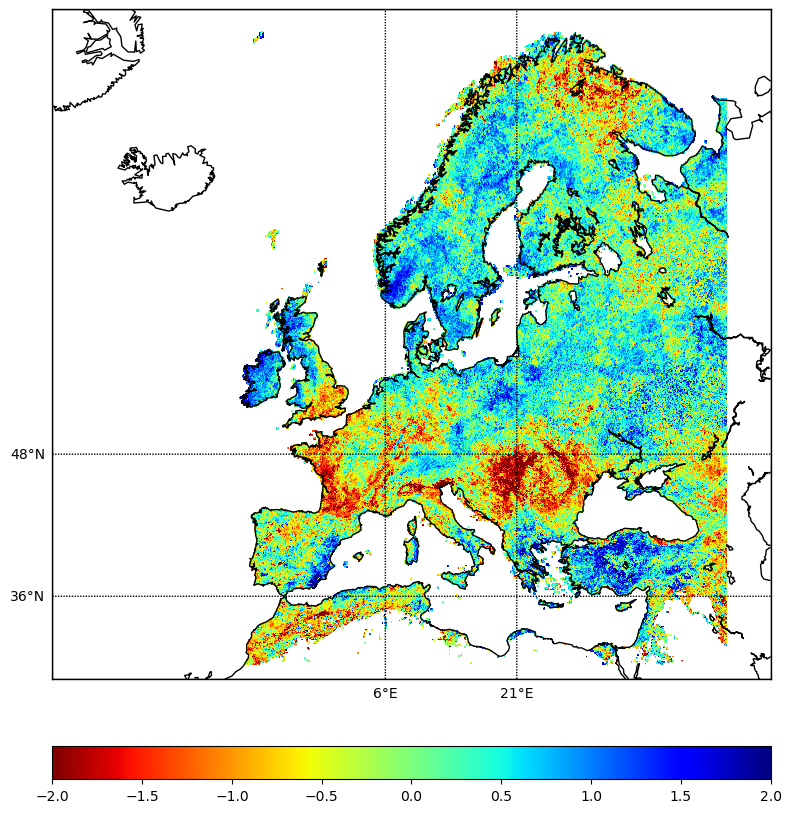

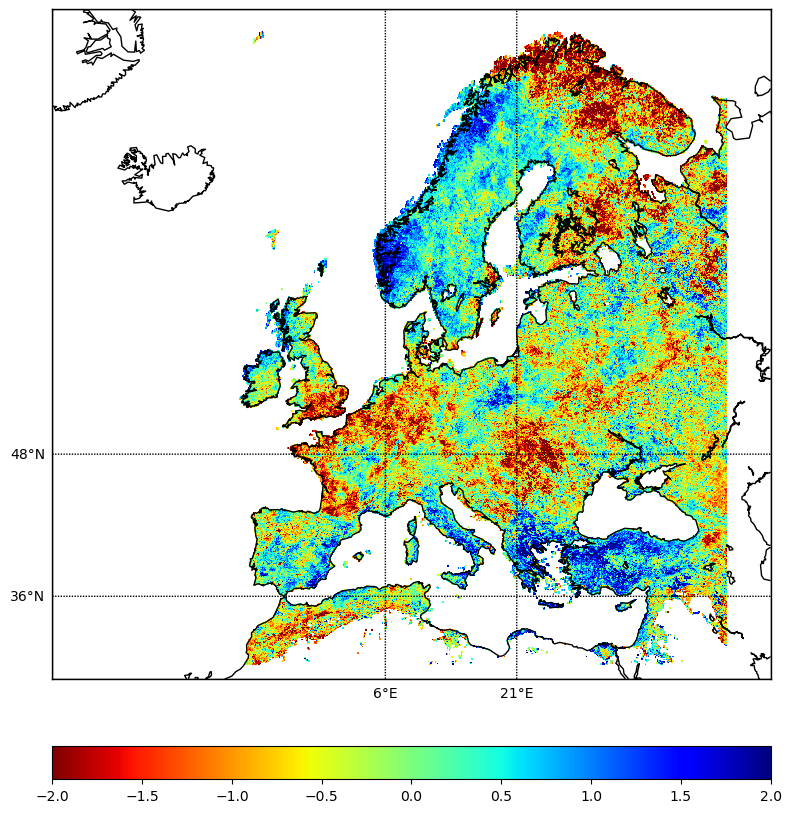

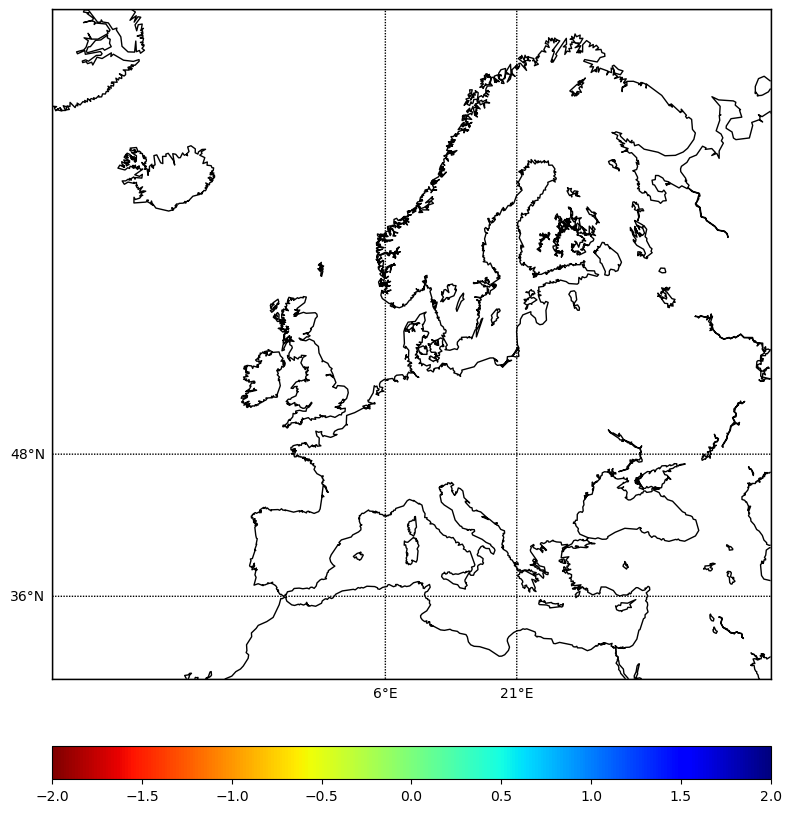

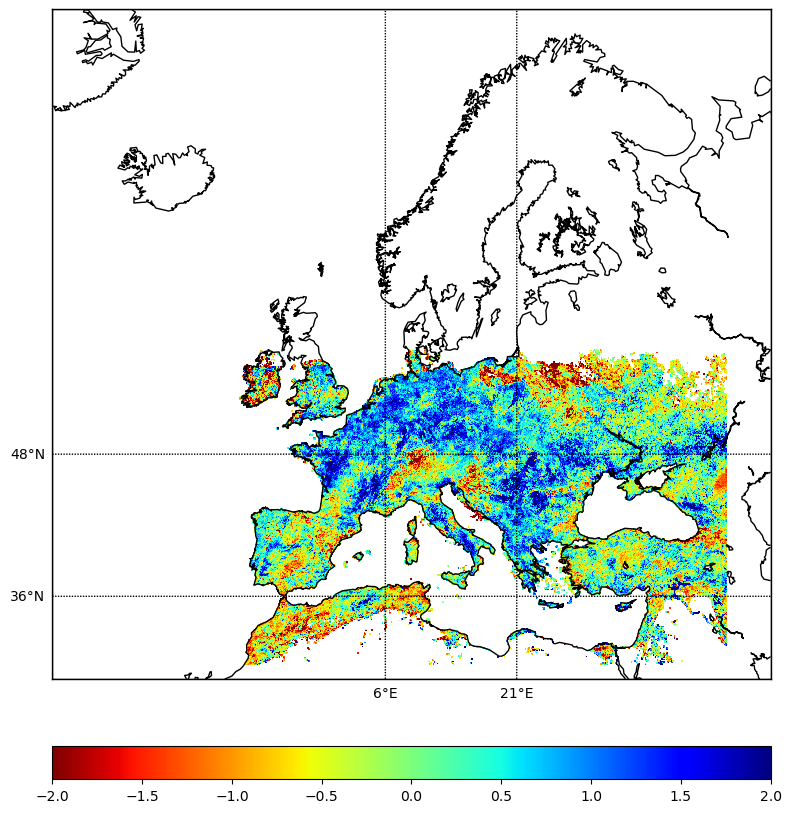

In [7]:
i = 0
while i < 11:

    m = Basemap(projection='merc', llcrnrlat=28.021, urcrnrlat=72.021, llcrnrlon=-32.021, urcrnrlon=49.979, resolution='l')
    lon2, lat2 = np.meshgrid(lon_fapan,lat_fapan)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(20,10))
    m.drawcoastlines()
    parallels = np.arange(36,49, 12.)
    meridians = np.arange(6,22, 15.)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
    m.drawmapboundary(fill_color='white')
    cmap = plt.cm.get_cmap('jet_r')
    cs = m.pcolor(x,y,fapar_a[i,:,:],cmap=cmap,vmin=-2, vmax=2)
    cbar = m.colorbar(cs, location='bottom', pad="10%")
    i = i + 1

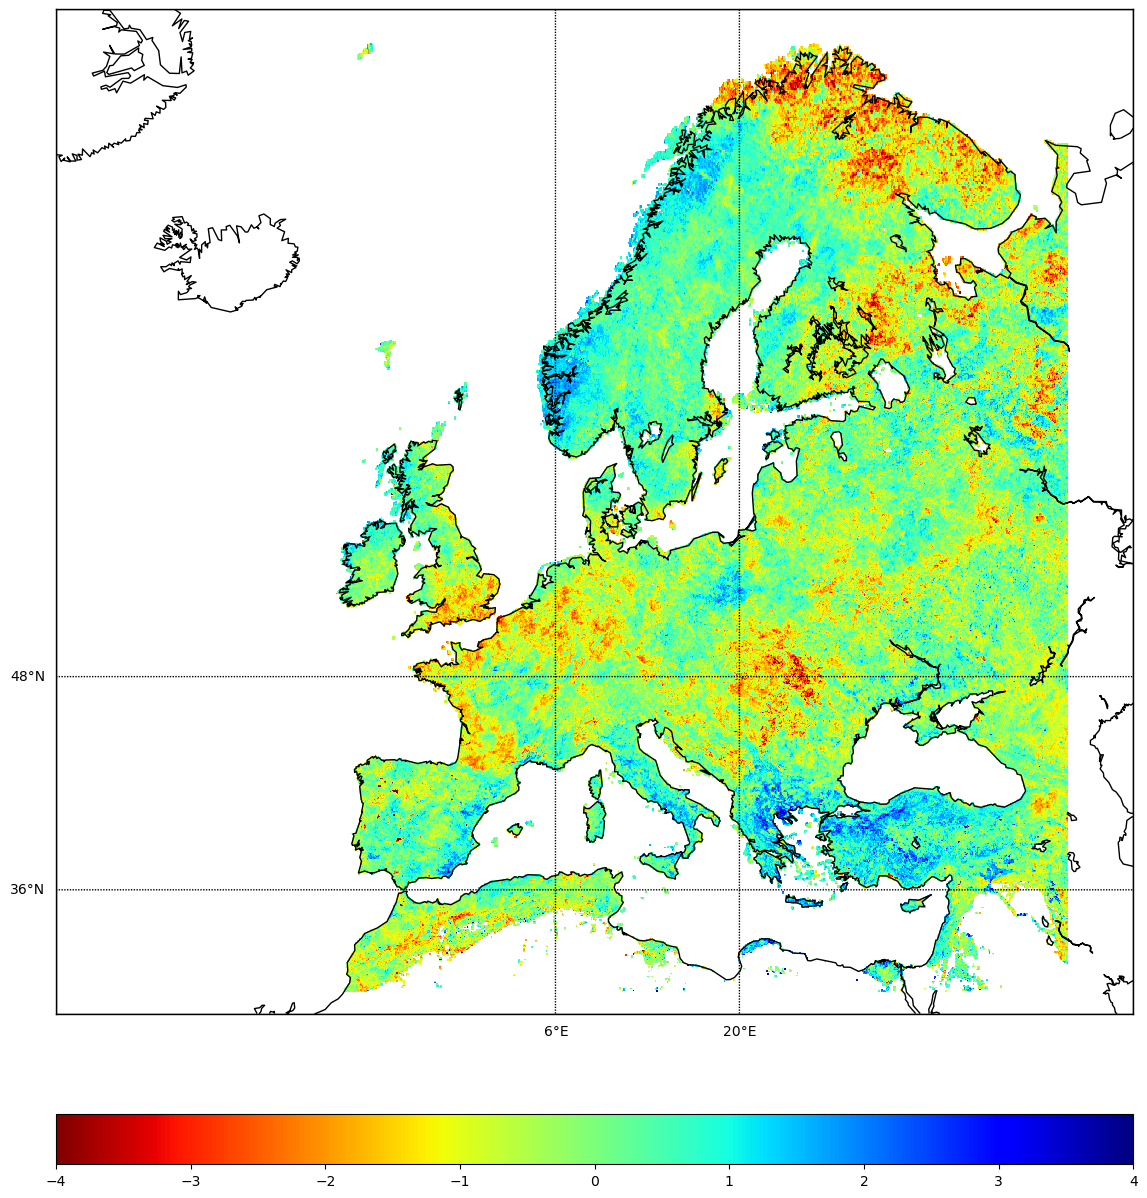

In [8]:
    m = Basemap(projection='merc', llcrnrlat=28.021, urcrnrlat=72.021, llcrnrlon=-32.021, urcrnrlon=49.979, resolution='l')
    lon2, lat2 = np.meshgrid(lon_fapan,lat_fapan)
    x, y = m(lon2, lat2)
    fig = plt.figure(figsize=(35,15))
    m.drawcoastlines()
    parallels = np.arange(36,49, 12.)
    meridians = np.arange(6,21, 14.)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
    m.drawmapboundary(fill_color='white')
    cmap = plt.cm.get_cmap('jet_r')
    cs = m.pcolor(x,y,fapar_a[8,:,:],cmap=cmap,vmin=-4, vmax=4)
    cbar = m.colorbar(cs, location='bottom', pad="10%")

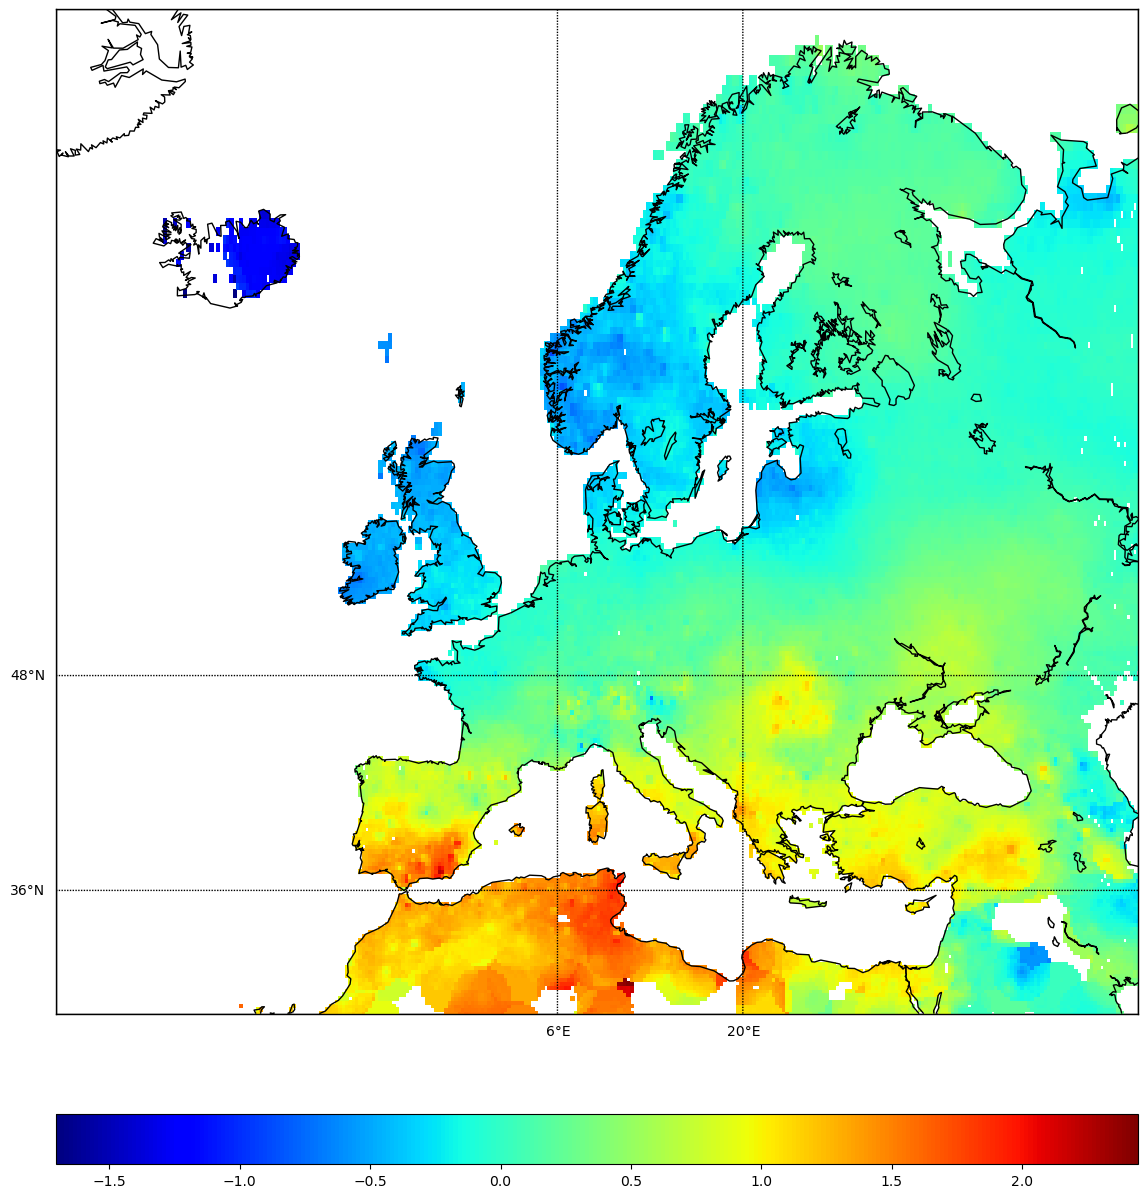

In [9]:
    mynorm = plt.Normalize(vmin=-5, vmax=5)
    m = Basemap(projection='merc', llcrnrlat=28.125, urcrnrlat=71.875, llcrnrlon=-31.875, urcrnrlon=49.875, resolution='l')
    lon2_temp, lat2_temp = np.meshgrid(lon_temp,lat_temp)
    x, y = m(lon2_temp, lat2_temp)
    fig = plt.figure(figsize=(35,15))
    m.drawcoastlines()
    parallels = np.arange(36,49, 12.)
    meridians = np.arange(6,21, 14.)
    m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
    m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)
    m.drawmapboundary(fill_color='white')
    cmap = plt.cm.get_cmap('jet')
    cs = m.pcolor(x,y,max_temp_a[11,:,:],cmap=cmap)
    cbar = m.colorbar(cs, location='bottom', pad="10%")